In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


In [2]:
from IPython.core.display import display
def plotMonthly(df,file_name,dir_path,month):
    
    df["timestamp"] = pd.to_datetime(df['timestamp'])
    df = df.set_index('timestamp')

    plot_dir = os.path.join(os.path.abspath('..'),'plotMonthly_perSecond')        
    if not os.path.exists(plot_dir):
      os.mkdir(plot_dir)
    dir_EB = os.path.join(plot_dir,dir_path)
    if not os.path.exists(dir_EB):
       os.mkdir(dir_EB)

    ax = df.plot()
    
    path_plot = os.path.join(dir_EB,file_name + month+".png")
    ax.set_title(file_name + " " + month)
    fig = ax.get_figure()
    fig.savefig(path_plot)
    

In [3]:
def createDFmonthly(df,file_name,dir_path):
    
    if not df[df['timestamp'].str.contains('2019-01')].empty:
        dfMonth = df[df['timestamp'].str.contains('2019-01')]
        plotMonthly(dfMonth,file_name,dir_path,'JAN')

    if not df[df['timestamp'].str.contains('2019-02')].empty:
        dfMonth = df[df['timestamp'].str.contains('2019-02')]
        plotMonthly(dfMonth,file_name,dir_path,'FEB')
    
    if not df[df['timestamp'].str.contains('2019-03')].empty:
        dfMonth = df[df['timestamp'].str.contains('2019-03')]
        plotMonthly(dfMonth,file_name,dir_path,'MAR')
    
    if not df[df['timestamp'].str.contains('2019-04')].empty:
        dfMonth = df[df['timestamp'].str.contains('2019-04')]
        plotMonthly(dfMonth,file_name,dir_path,'APRIL')
    
    if not df[df['timestamp'].str.contains('2019-05')].empty:
        dfMonth = df[df['timestamp'].str.contains('2019-05')]
        plotMonthly(dfMonth,file_name,dir_path,'MAY')
    
    if not df[df['timestamp'].str.contains('2019-06')].empty:
        dfMonth = df[df['timestamp'].str.contains('2019-06')]
        plotMonthly(dfMonth,file_name,dir_path,'JUN')

    
    

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


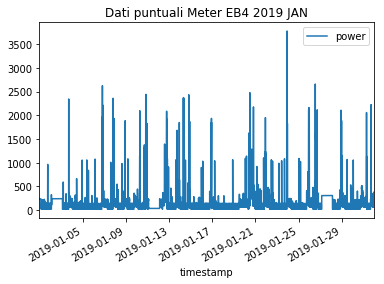

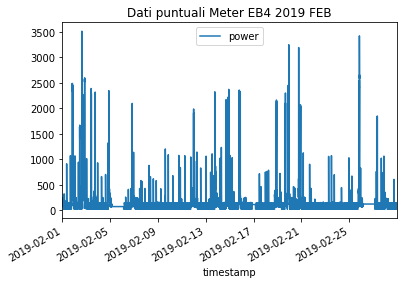

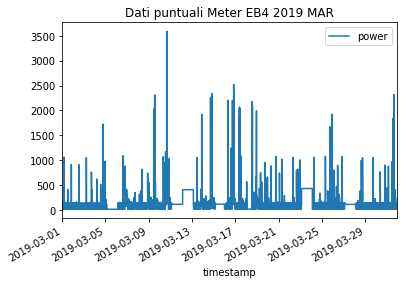

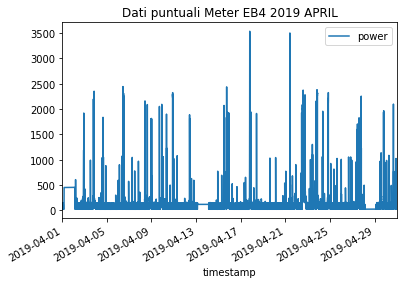

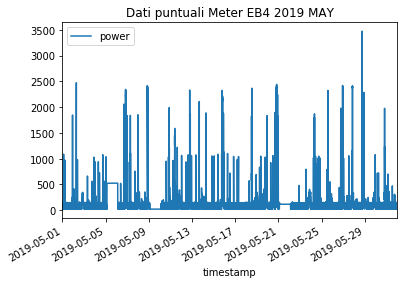

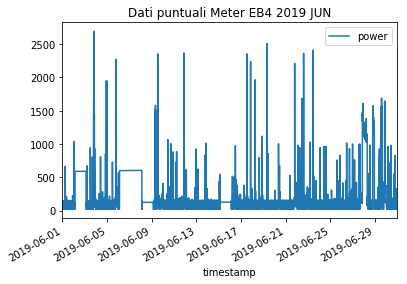

In [4]:
#PATH = '../Dati ricostruiti al secondo'
PATH = '../Dati puntuali Smart HOME'
#PATH = '../datasetProva'

for r,dir,f in os.walk(PATH):
    for d in dir:
        DIR_PATH = d
        p = os.path.join(r,DIR_PATH)
        for r1,d1,f1 in os.walk(p):
            for file in f1 :
                chunksize = 50000
                file_path = os.path.join(PATH,DIR_PATH,file)
                df = pd.read_csv(file_path, sep=',', chunksize=chunksize, iterator=True)
                df = pd.concat(df, ignore_index=True)
                file_name = file.split('.')[0]
                
                createDFmonthly(df,file_name,DIR_PATH)
                